# Algorithm Testing

In [5]:
import sys
from collections import OrderedDict

import csv, nltk, math, string
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

from scrapers import logger
from Truth import Page
from nlp import cos_similarity

from sklearn.metrics import roc_curve, confusion_matrix, classification_report

logger.ignorewarnings = True


**1. Get a path matrix from a CSV File.**

This will ensure that the pages have their corresponding backlinks and page content in the database. The code below will transform the pathstrings into a list of traversed <Page> objects.

In [2]:
pathlist = []

with open('data/out/t2_output.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';', quotechar='"')
    processed_count = 0
    pathlist = list(reader)

## Create Lemmatization Methods

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leryc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1.0

## Calculate the truth values.
### Standard Metric Closure with TFIDF

In [69]:

processed_count = 0
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer




def idf(n,df):
            result = math.log((n+1.0)/(df+1.0)) + 1
            return result
        
import pandas as pd

metric_tfidf = pd.DataFrame( columns= list(pathlist[0].keys())[1:])

keys = pathlist[0].keys()
for row in pathlist:
    
    print(f"[{processed_count+1}/{len(pathlist[1:])}]")
    
    
    # limit the number of things to process
    processed_count+=1
    
    # the metrics
    row_metric = []
    print(list(row.keys()))
    for x in list(row.keys())[1:]:# do not include row header
        
        path = [Page(d) for d in row[x].split('>')]
        
        
        source = path[0] # get the first element of the path
        dest = path[len(path)-1] # get the last element of the path
        
        
        # SKLEARN PARTS
        # Turn text into vectors of term frequency:
        documents = [source.pagecontent, dest.pagecontent]
        
        
        TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
        def cos_similarity(textlist):
            tfidf = TfidfVec.fit_transform(textlist)
            return (tfidf * tfidf.T).toarray()
        if row[x] not in tfs.keys():
            cos_sim = cos_similarity(documents)
            tfs[row[x]] = cos_sim
        else:
            cos_sim = tfs[row[x]]
        
        
        # normalize the cosine similarity to 0.25 range.
        #cos_sim = normalizenumber(cos_sim[0][1], 0, 0.25, 1)
        cos_sim = cos_sim[0][1]
        truthvalue = 1.00
        for x in path[1:]:
            truthvalue+=math.log((normalizenumber(x.backlinkcount, 1, 500000, 500000))*(cos_sim))
            #truthvalue+=math.log(x.backlinkcount*(1-cos_sim))
            
        truthvalue = 1/truthvalue
        truthvalue*=0.5
        truthvalue+=cos_sim*0.5
        #print(f"{source.title} -> {dest.title} = {truthvalue}")
        
        
        row_metric.append(truthvalue)
        
        
    df2 = pd.DataFrame([row_metric], columns=list(row.keys())[1:])
    metric_tfidf = metric_tfidf.append(df2, ignore_index=True)
    print(str(processed_count)+"/"+str(len(pathlist)))
# TODO: append data to dataframe***

metric_tfidf.to_csv('metric_sp.csv', sep=';')
metric_tfidf
    

[1/16]
['x-entity', 'Edith Wilson', 'Florence Harding', 'Grace Coolidge', 'Lou Henry Hoover', 'Eleanor Roosevelt', 'Bess Truman', 'Mamie Eisenhower', 'Jacqueline Kennedy Onassis', 'Lady Bird Johnson', 'Pat Nixon', 'Betty Ford', 'Rosalynn Carter', 'Nancy Reagan', 'Barbara Bush', 'Hillary Clinton', 'Laura Bush', 'Michelle Obama']
1/17
[2/16]
['x-entity', 'Edith Wilson', 'Florence Harding', 'Grace Coolidge', 'Lou Henry Hoover', 'Eleanor Roosevelt', 'Bess Truman', 'Mamie Eisenhower', 'Jacqueline Kennedy Onassis', 'Lady Bird Johnson', 'Pat Nixon', 'Betty Ford', 'Rosalynn Carter', 'Nancy Reagan', 'Barbara Bush', 'Hillary Clinton', 'Laura Bush', 'Michelle Obama']
2/17
[3/16]
['x-entity', 'Edith Wilson', 'Florence Harding', 'Grace Coolidge', 'Lou Henry Hoover', 'Eleanor Roosevelt', 'Bess Truman', 'Mamie Eisenhower', 'Jacqueline Kennedy Onassis', 'Lady Bird Johnson', 'Pat Nixon', 'Betty Ford', 'Rosalynn Carter', 'Nancy Reagan', 'Barbara Bush', 'Hillary Clinton', 'Laura Bush', 'Michelle Obama']


,Edith Wilson,Florence Harding,Grace Coolidge,Lou Henry Hoover,Eleanor Roosevelt,Bess Truman,Mamie Eisenhower,Jacqueline Kennedy Onassis,Lady Bird Johnson,Pat Nixon,Betty Ford,Rosalynn Carter,Nancy Reagan,Barbara Bush,Hillary Clinton,Laura Bush,Michelle Obama
0,0.345832,0.151304,0.140577,0.125341,0.186324,0.164082,0.128410,0.189127,0.151721,0.193691,0.152437,0.160169,0.186251,0.143621,0.161625,0.134346,0.163595
1,0.129473,0.358388,0.161716,0.143502,0.201002,0.161156,0.125276,0.159698,0.151995,0.152332,0.134937,0.141022,0.158354,0.142355,0.149541,0.132093,0.157074
2,0.110236,0.138018,0.404437,0.138703,0.153955,0.152005,0.118811,0.140317,0.132128,0.136760,0.114290,0.115829,0.136916,0.124168,0.146616,0.111157,0.159677
3,0.119827,0.128262,0.122990,0.344201,0.196122,0.136149,0.108875,0.147873,0.121720,0.130646,0.122246,0.124374,0.140219,0.125541,0.134020,0.118573,0.163617
4,0.144129,0.123448,0.120823,0.114708,0.421958,0.155519,0.106683,0.170632,0.139136,0.151437,0.117101,0.147095,0.153165,0.137932,0.173869,0.106349,0.154638
5,0.113881,0.137259,0.118546,0.111614,0.204413,0.335767,0.114692,0.136633,0.147686,0.165726,0.131161,0.131387,0.160174,0.113940,0.137551,0.110463,0.171301
6,0.132841,0.161455,0.141714,0.146701,0.217748,0.180863,0.388373,0.229455,0.149609,0.235736,0.179395,0.151148,0.201877,0.142560,0.159540,0.129241,0.162095
7,0.126929,0.146760,0.129749,0.127315,0.229292,0.172531,0.165254,0.419795,0.201567,0.230269,0.131727,0.161712,0.184500,0.134778,0.183965,0.150745,0.185139
8,0.134451,0.142106,0.125633,0.116901,0.188912,0.231424,0.117749,0.256790,0.267618,0.196096,0.144490,0.151364,0.195652,0.165670,0.174059,0.159137,0.174135
9,0.125187,0.148937,0.124933,0.116747,0.198081,0.154502,0.160207,0.215084,0.171045,0.390730,0.182695,0.171902,0.198721,0.183683,0.203950,0.134705,0.153780


## Save data to CSV

In [11]:
tfs

{'Woodrow Wilson>League of Nations>Edith Wilson': array([[1.        , 0.62365427],
        [0.62365427, 1.        ]]),
 'Woodrow Wilson>Warren G. Harding>Florence Harding': array([[1.        , 0.21245383],
        [0.21245383, 1.        ]]),
 'Woodrow Wilson>Edith Wilson>Grace Coolidge': array([[1.        , 0.16917416],
        [0.16917416, 1.        ]]),
 'Woodrow Wilson>Herbert Hoover>Lou Henry Hoover': array([[1.        , 0.16559503],
        [0.16559503, 1.        ]]),
 'Woodrow Wilson>Franklin D. Roosevelt>Eleanor Roosevelt': array([[1.        , 0.31099253],
        [0.31099253, 1.        ]]),
 'Woodrow Wilson>Edith Wilson>Bess Truman': array([[1.        , 0.22743394],
        [0.22743394, 1.        ]]),
 'Woodrow Wilson>Edith Wilson>Mamie Eisenhower': array([[1.        , 0.15477848],
        [0.15477848, 1.        ]]),
 'Woodrow Wilson>William Randolph Hearst>Jacqueline Kennedy Onassis': array([[1.        , 0.30576853],
        [0.30576853, 1.        ]]),
 'Woodrow Wilson>Edith W

## Load existing data from CSV

In [ ]:
metric_tfidf.to_csv('metric_squared.csv', sep=';')
metric_tfidf

In [ ]:
# RUN This when loading from a CSV. Otherwise dont run.

metric_tfidf = pd.read_csv('saved_csvs/hdf.csv', sep=';')
metric_tfidf = metric_tfidf.drop(metric_tfidf.columns[0], axis=1)
metric_tfidf[:3]

metric = pd.read_csv('saved_csvs/metric_standard.csv', sep=';')
metric = metric.drop(metric.columns[0], axis=1)
metric[:3]

## Charts n stuff
**WITH TFIDF/Cosine Similarity**

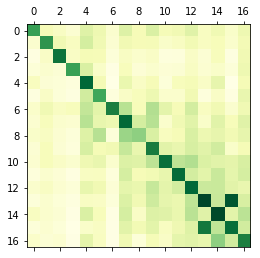

In [82]:

#plt.cm?
plt.matshow(metric_tfidf,cmap=plt.cm.YlGn)
plt.show()
# TODO: repalce numbers with acronyms (e.g. WW, EW)

In [ ]:

ypred = cross_val_predict(svm_clf, X, y, cv=5)
print(classification_report(y, ypred, digits=10))
conf_mx = confusion_matrix(y, ypred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

## ROC

In [ ]:

yw_scores = cross_val_predict(svm_clfw, Xw, yw, cv=5, method="decision_function")
fpr, tpr, thresholds = roc_curve(yw, yw_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(svm_clf, X, y, cv=5, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

plot_roc_curve(fpr, tpr)
plt.show()

## COMPARISON

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

#clear figure
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y, y_scores)
auc = metrics.roc_auc_score( y, y_scores)
plt.plot(fpr,tpr,label="WITH TFIDF/Cos Sim, auc="+repr(auc))


fpr, tpr, thresh = metrics.roc_curve(yw, yw_scores)
auc = metrics.roc_auc_score(yw, yw_scores)
plt.plot(fpr,tpr,label="Without TFIDF/Cos Sim, auc="+repr(auc))

plt.plot([0,1],[0,1],'k--')

plt.legend(loc=0)

In [ ]:
metric[:3]
#ambot 

In [ ]:
a

In [ ]:
# IMPORTANT METHODS IN PANDAS

# Inserting pandas series at index.
a.insert(0, 'politician', pandas2['x-entity'])

# inserting pandaas series at end of dataframe.
pd2['colname'] = a_pandas_series
